In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#Set numpy and Tensorflow random seed to mask sure experiment reproducible(only works in CPU mode).
from numpy.random import seed
seed(123)
#from tensorflow import set_random_seed
#set_random_seed(123)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import imageio

import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from image_process import ImageProcess
import cv2

2024-07-31 10:24:23.604836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 10:24:23.604882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 10:24:23.605970: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 10:24:23.611488: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 10:24:24.205461: W tensorflow/compiler/tf2

In [3]:
image_path = '/data/Dataset_Elahe/Collector/_out/'
mask_path = '/data/Dataset_Elahe/Collector/seg/'
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+i for i in image_list]
mask_list = [mask_path+i for i in mask_list]

0
256
image_2024-07-09-41-26_00000668.png
1
256
image_2024-07-09-41-22_00000600.png
2
256
et_Elahe/Collector/seg/image_hi.png
3
256
image_2024-07-09-41-25_00000643.png
4
256
image_2024-07-09-41-25_00000637.png
5
256
image_2024-07-09-41-22_00000603.png
6
256
image_2024-07-09-41-22_00000601.png
7
256
image_2024-07-09-41-26_00000655.png
8
256
image_2024-07-09-41-23_00000606.png
9
256
image_2024-07-09-41-23_00000604.png
10
256
image_2024-07-09-41-27_00000674.png
11
256
image_2024-07-09-41-24_00000618.png
12
256
image_2024-07-09-41-27_00000680.png
13
256
image_2024-07-09-41-24_00000631.png
14
256
image_2024-07-09-41-23_00000612.png
15
256
image_2024-07-09-41-25_00000649.png
16
256
image_2024-07-09-41-26_00000661.png
17
256
image_2024-07-09-41-24_00000624.png


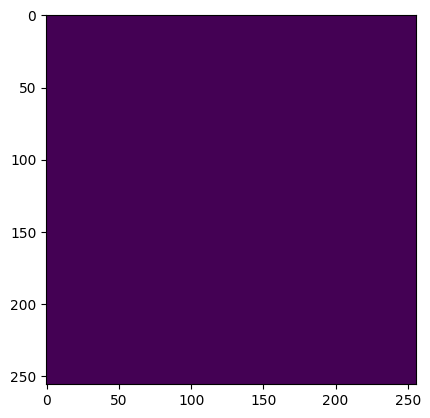

In [6]:
for i in range(len(mask_list)):
    print(i)
    #img = cv2.resize(cv2.imread(image_list[i]),(256,256))
    mask1 = cv2.resize(cv2.imread(mask_list[i]),(256,256))
    #plt.imshow(mask1)
    print(len(mask1))
    road = np.zeros((256, 256))
    #road[np.where(mask==128),np.where(mask==128)]=1
    road[np.where(mask1==128)[0], np.where(mask1==128)[1]]=255
    plt.imshow(road)
    print(mask_list[i][-35:])
    #cv2.imwrite(f'/data/Dataset_Elahe/Collector/road/{mask_list[i][-53:]}',road)
    #cv2.imwrite(f'/home/bimi/Bimi/users/Elahe/Active_inference/segmentation/segment_flip/{mask_list[i][-35:]}',road)

In [9]:
mask1 = cv2.resize(cv2.imread(mask_list[2]),(256,256))
#plt.imshow(mask1)
road = np.zeros((256, 256))
#road[np.where(mask==128),np.where(mask==128)]=1
road[np.where(mask1==128)[0], np.where(mask1==128)[1]]=255

In [10]:
cv2.imwrite(f'/data/Dataset_Elahe/Collector/road/out4.png',road)
#gray_image = cv2.cvtColor(masks[1], cv2.COLOR_BGR2GRAY)

True

In [12]:
from tqdm import tqdm

In [13]:
height, width = 160, 160
images = np.zeros((len(image_list), height, width, 3), dtype=np.int16)
masks = np.zeros((len(image_list), height, width, 1), dtype=np.int8)

for n in tqdm(range(len(image_list))):
    img = cv2.resize(cv2.imread(image_list[n]),(160, 160))
    #img.resize((160, 160,3))
    
    mask = cv2.resize(cv2.imread(mask_list[n]),(160, 160))
    #mask.resize((160, 160))
    mask_road = np.zeros((160, 160, 1), dtype=np.int8)
    mask_road[np.where(mask==128)[0], np.where(mask==128)[1]]=1
    
    images[n] = img
    masks[n] = mask_road

100%|██████████| 18/18 [00:00<00:00, 26.64it/s]


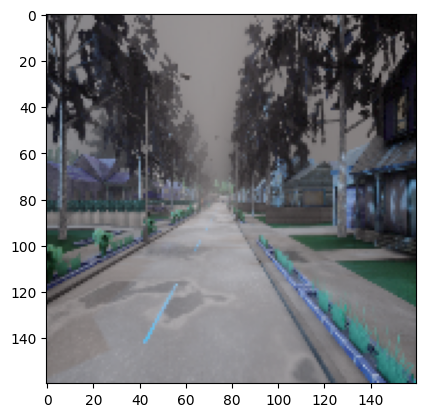

In [14]:
plt.imshow(images[1].reshape(160, 160, 3))

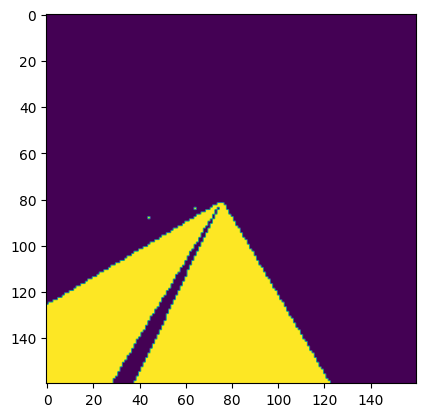

In [15]:
plt.imshow(masks[1].reshape(160, 160, 1))

In [25]:
cv2.imwrite(f'/data/Dataset_Elahe/Collector/road/out2.png',masks[1].reshape(160, 160, 1))

True